In [1]:
import json
import os
import pandas as pd
import spacy
nlp = spacy.load('en_core_web_lg')
import seaborn as sns

In [2]:
def normalize_data_v0(data):
    result = []
    for row in data:
        result.append({
            'id': row['id'],
            'parent_id': row['parent_id'],
            'user_id': row['user_id'],
            'message': row['message']
        })
        if 'replies' in row:
            result += normalize_data_v0(row['replies'])
    return result

In [3]:
def normalize_data_v1(data):
    result = []
    posts = list(data.values())[0]
    for row in posts:
        result.append({
            'id': row['id'],
            'parent_id': row['parent_id'],
            'user_id': row['user_id'],
            'message': row['message']
        })
        if 'replies' in row:
            result += normalize_data_v1(row['replies'])
    return result

In [4]:
def normalize_data_v2(data):
    result = []
    for row in data:
        result.append({
            'id': row['id'],
            'parent_id': row['parent_id'],
            'user_id': row['user_id'],
            'message': row['message']
        })
        if 'replies' in row:
            result += normalize_data_v2(row['replies'])
        elif 'recent_replies' in row:
            result += normalize_data_v2(row['recent_replies'])
    return result


In [5]:
def normalize_data_v3(data):
    result = []
    for key in data.keys():
        for row in data[key]:
            result.append({
                'id': row['id'],
                'parent_id': row['parent_id'],
                'user_id': row['user_id'],
                'message': row['message']
            })
            if 'replies' in row:
                result += normalize_data_v3(row['replies'])
    return result


In [6]:
directory = "data"

In [7]:
all_data = []
dataframes = []
for filename in os.listdir(directory):
    if filename.endswith('.json'):
        with open(os.path.join(directory, filename)) as f:
            data = json.load(f)
            normalized_data = normalize_data_v3(data)
            df = pd.DataFrame(normalized_data)
            df['course_id_number'] = filename.split('_')[0]
            #all_data.append(normalized_data)
            dataframes.append(df)

df_final = pd.concat(dataframes, ignore_index=True)

#with open("combined_and_normalized.json", "w") as f:
    #json.dump(all_data, f)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'data'

In [ ]:
len(df_final)

4316

In [ ]:
df_final.head(50)

,id,parent_id,user_id,message,course_id_number
0,18813222,None,3885812,<p>When I read foreweird and the introduction ...,1149116
1,18594230,None,3878246,<p><span>I believe a very notable concept was ...,1149116
2,18568066,None,3881196,<p>What interested me the most about week one’...,1149116
3,18568048,None,1612050,"<p>As mentioned in my short <a id=""media_comme...",1149116
4,18565190,None,3880146,"<p><span style=""font-family: Arial;""><span sty...",1149116
5,18565148,None,3885800,"<p>""You can't always get what you want, but yo...",1149116
6,18565142,None,3878152,"<p>Out of all the text, the ""Supernatural Horr...",1149116
7,18564628,None,3889400,What stood out to me was reading about fear an...,1149116
8,18564440,None,3885848,<p>What stood out to me the most would be Sigm...,1149116
9,18564190,None,3815649,<p>I didn't know what to expect from weird fic...,1149116


In [ ]:
df_final.course_id_number.unique()

array(['1149116', '1150006', '1154406', '1155902', '1158756', '1160142',
       '1163902', '1166460', '1171836'], dtype=object)

In [ ]:
df_final.to_json('all_combined.json', orient='records')

In [ ]:
def clean_text(text):
    import re
    text = re.sub(r'<.*?>', '', text) # remove HTML tags
    text = text.replace('\n', ' ').replace('&nbsp;', ' ')

    # replace Unicode characters
    text = text.translate(str.maketrans({'\u2019':"'"}))
    return text

In [ ]:
df_final['html_stripped'] = df_final.message.apply(clean_text)
df_final.head(25)

,id,parent_id,user_id,message,course_id_number,html_stripped
0,18813222,None,3885812,<p>When I read foreweird and the introduction ...,1149116,When I read foreweird and the introduction fro...
1,18594230,None,3878246,<p><span>I believe a very notable concept was ...,1149116,I believe a very notable concept was in Tyson'...
2,18568066,None,3881196,<p>What interested me the most about week one’...,1149116,What interested me the most about week one's r...
3,18568048,None,1612050,"<p>As mentioned in my short <a id=""media_comme...",1149116,"As mentioned in my short ""Week 1 Discussion Bo..."
4,18565190,None,3880146,"<p><span style=""font-family: Arial;""><span sty...",1149116,The oldest and strongest emotion of mankind is...
5,18565148,None,3885800,"<p>""You can't always get what you want, but yo...",1149116,"""You can't always get what you want, but you g..."
6,18565142,None,3878152,"<p>Out of all the text, the ""Supernatural Horr...",1149116,"Out of all the text, the ""Supernatural Horror ..."
7,18564628,None,3889400,What stood out to me was reading about fear an...,1149116,What stood out to me was reading about fear an...
8,18564440,None,3885848,<p>What stood out to me the most would be Sigm...,1149116,What stood out to me the most would be Sigmund...
9,18564190,None,3815649,<p>I didn't know what to expect from weird fic...,1149116,I didn't know what to expect from weird fictio...


In [ ]:
def count_words(df, column):
    word_counts = []
    for text in df[column]:
        doc = nlp(text)
        word_counts.append(len([token.text for token in doc]))
    df['word_counts'] = word_counts
    return df

In [ ]:
final_df = count_words(df_final, 'html_stripped')

In [ ]:
final_df.head(25)

,id,parent_id,user_id,message,course_id_number,html_stripped,word_counts
0,18813222,None,3885812,<p>When I read foreweird and the introduction ...,1149116,When I read foreweird and the introduction fro...,188
1,18594230,None,3878246,<p><span>I believe a very notable concept was ...,1149116,I believe a very notable concept was in Tyson'...,129
2,18568066,None,3881196,<p>What interested me the most about week one’...,1149116,What interested me the most about week one's r...,284
3,18568048,None,1612050,"<p>As mentioned in my short <a id=""media_comme...",1149116,"As mentioned in my short ""Week 1 Discussion Bo...",34
4,18565190,None,3880146,"<p><span style=""font-family: Arial;""><span sty...",1149116,The oldest and strongest emotion of mankind is...,190
5,18565148,None,3885800,"<p>""You can't always get what you want, but yo...",1149116,"""You can't always get what you want, but you g...",131
6,18565142,None,3878152,"<p>Out of all the text, the ""Supernatural Horr...",1149116,"Out of all the text, the ""Supernatural Horror ...",322
7,18564628,None,3889400,What stood out to me was reading about fear an...,1149116,What stood out to me was reading about fear an...,144
8,18564440,None,3885848,<p>What stood out to me the most would be Sigm...,1149116,What stood out to me the most would be Sigmund...,208
9,18564190,None,3815649,<p>I didn't know what to expect from weird fic...,1149116,I didn't know what to expect from weird fictio...,282


In [ ]:
def count_sentences(df, column):
    sentence_counts = []
    for text in df[column]:
        doc = nlp(text)
        sentence_counts.append(len(list(doc.sents)))
    df['sentence_counts'] = sentence_counts
    return df

final_df = count_sentences(df_final, 'html_stripped')

In [ ]:
def count_words_and_sentences_all_in_one_function(df, text_column):
    nlp = spacy.load("en_core_web_lg")
    word_counts = []
    sentence_counts = []
    for text in df[text_column]:
        doc = nlp(text)
        word_counts.append(len([token.text for token in doc]))
        sentence_counts.append(len(list(doc.sents)))
    df['word_count'] = word_counts
    df['sentence_counts'] = sentence_counts
    return df

In [ ]:
final_df.head()

,id,parent_id,user_id,message,course_id_number,html_stripped,word_counts,sentence_counts
0,18813222,None,3885812,<p>When I read foreweird and the introduction ...,1149116,When I read foreweird and the introduction fro...,188,6
1,18594230,None,3878246,<p><span>I believe a very notable concept was ...,1149116,I believe a very notable concept was in Tyson'...,129,8
2,18568066,None,3881196,<p>What interested me the most about week one’...,1149116,What interested me the most about week one's r...,284,9
3,18568048,None,1612050,"<p>As mentioned in my short <a id=""media_comme...",1149116,"As mentioned in my short ""Week 1 Discussion Bo...",34,2
4,18565190,None,3880146,"<p><span style=""font-family: Arial;""><span sty...",1149116,The oldest and strongest emotion of mankind is...,190,7


In [ ]:
final_df.columns

Index(['id', 'parent_id', 'user_id', 'message', 'course_id_number',
       'html_stripped', 'word_counts', 'sentence_counts'],
      dtype='object')

In [ ]:
final_df.course_id_number.unique()

array(['1149116', '1150006', '1154406', '1155902', '1158756', '1160142',
       '1163902', '1166460', '1171836'], dtype=object)

C:\Users\KSpicer\AppData\Local\Temp\ipykernel_4468\1749006475.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df.groupby(course_id_column).mean()


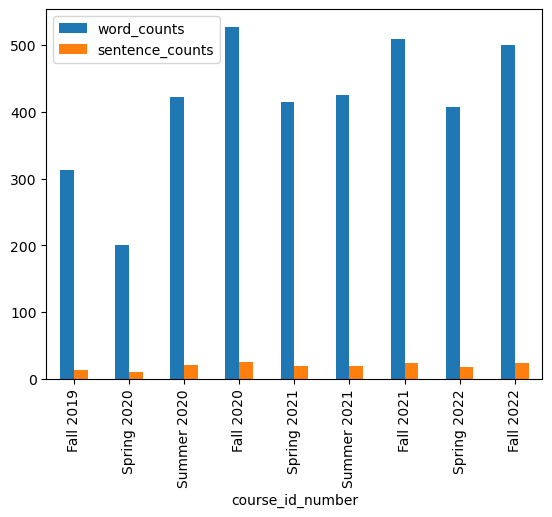

In [ ]:
import matplotlib.pyplot as plt

def plot_averages(df, course_id_column, word_count_column, sentence_count_column):
    grouped = df.groupby(course_id_column).mean()
    ax = grouped[[word_count_column, sentence_count_column]].plot(kind='bar')
    
    labels = ['Fall 2019', 'Spring 2020', 'Summer 2020', 'Fall 2020', 'Spring 2021', 'Summer 2021', 'Fall 2021', 'Spring 2022', 'Fall 2022']
    ax.set_xticklabels(labels)
    plt.show()

plot_averages(final_df, 'course_id_number', 'word_counts', 'sentence_counts')

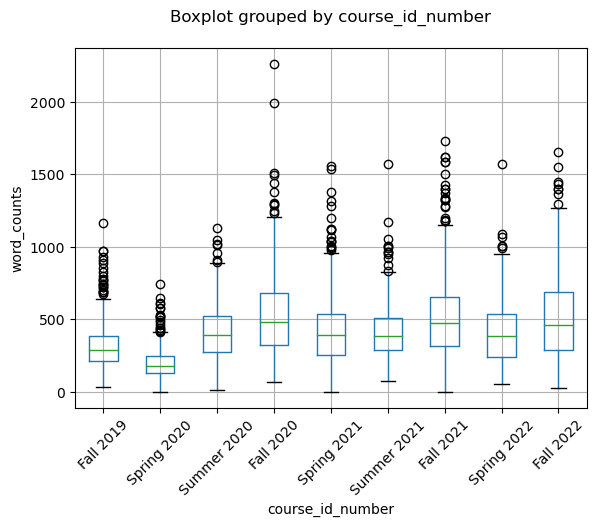

In [ ]:
def plot_box_plots(df, course_id_column, word_count_column):
    fig, ax = plt.subplots()
    df.boxplot(column=word_count_column, by=course_id_column, ax=ax)
    ax.set_title("")
    labels = ['Fall 2019', 'Spring 2020', 'Summer 2020', 'Fall 2020', 'Spring 2021', 'Summer 2021', 'Fall 2021', 'Spring 2022', 'Fall 2022']
    ax.set_xticklabels(labels)
    ax.set_ylabel("word_counts")
    plt.xticks(rotation=45)
    plt.show()

plot_box_plots(final_df, 'course_id_number', 'word_counts')

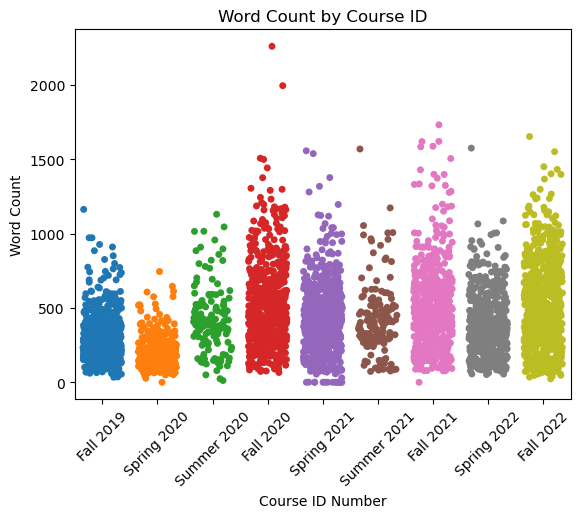

In [ ]:
def plot_stripplots(df, course_id_column, word_count_column):
    sns.stripplot(x=course_id_column, y=word_count_column, data= df, hue=course_id_column, jitter=.35, legend=False)
    plt.title('Word Count by Course ID')
    plt.xlabel('Course ID Number')
    plt.ylabel('Word Count')
    labels = ['Fall 2019', 'Spring 2020', 'Summer 2020', 'Fall 2020', 'Spring 2021', 'Summer 2021', 'Fall 2021', 'Spring 2022', 'Fall 2022']
    plt.xticks(rotation=45)
    plt.xticks(df[course_id_column].unique(), labels, rotation=45)
    plt.show()

plot_stripplots(final_df, 'course_id_number', 'word_counts')

In [ ]:
def multiple_plots_of_word_counts(df, course_id_column, word_count_column):
    labels = ['Fall 2019', 'Spring 2020', 'Summer 2020', 'Fall 2020', 'Spring 2021', 'Summer 2021', 'Fall 2021', 'Spring 2022', 'Fall 2022']
    num_unique_courses = df[course_id_column].nunique()
    fig, axes = plt.subplots(2, 2, figsize=(20, 10), sharex=False, gridspec_kw={"hspace": 0.5})
    fig.suptitle("Word Counts by Course ID", fontsize=16)
    df.boxplot(column=word_count_column, by=course_id_column, ax=axes[0, 0])
    sns.stripplot(x=course_id_column, y=word_count_column, data=df, ax=axes[0, 1])
    sns.violinplot(x=course_id_column, y=word_count_column, data=df, ax=axes[1, 0])
    sns.swarmplot(x=course_id_column, y=word_count_column, data=df, ax=axes[1, 1])
    for i in range(2):
        for j in range(2):
            axes[i, j].set_xticklabels(labels[:num_unique_courses])
            axes[i, j].set_xlabel('Semester and Year')
            axes[i, j].set_ylabel('Word Count')
            axes[i, j].set_title('Word Count by Course ID')
            axes[i, j].tick_params(labelrotation=45)

    plt.show()

c:\Users\KSpicer\Anaconda3\envs\python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 78.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\KSpicer\Anaconda3\envs\python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 78.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\KSpicer\Anaconda3\envs\python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 28.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\KSpicer\Anaconda3\envs\python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 68.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\KSpicer\Anaconda3\envs\pyth

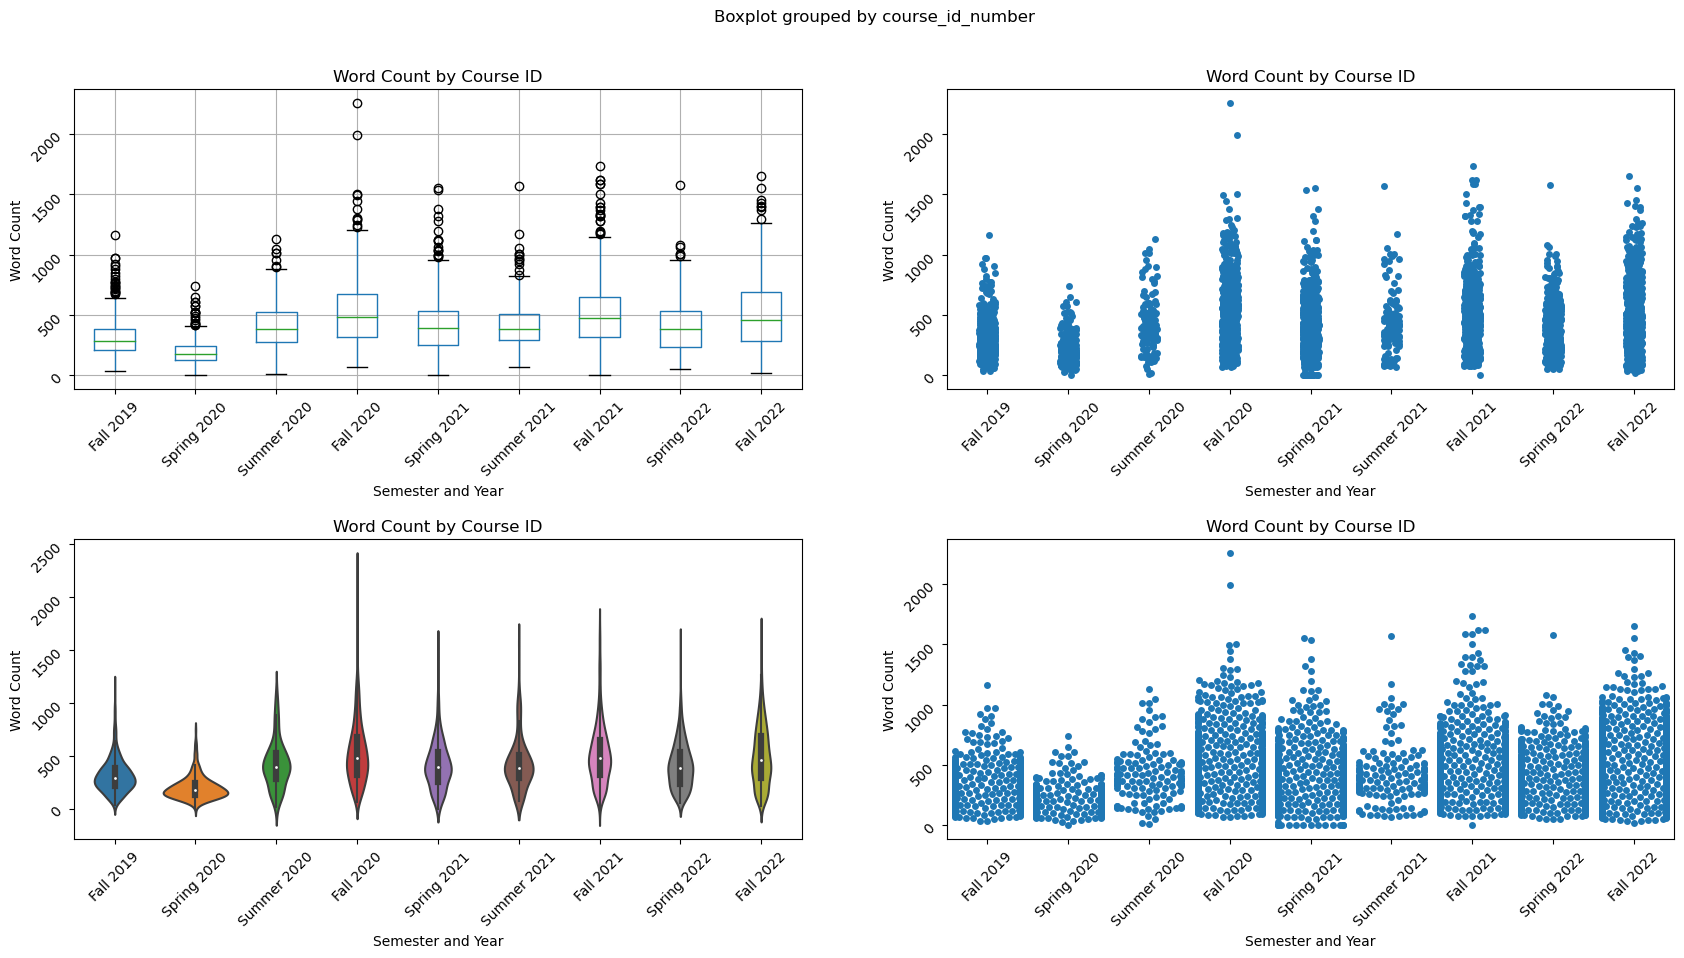

In [ ]:
multiple_plots_of_word_counts(final_df, 'course_id_number', 'word_counts')

In [ ]:
import numpy as np
from kmodes.kprototypes import KPrototypes
from sklearn.feature_extraction.text import TfidfVectorizer

# Separate the categorical and text columns
cat_cols = ['course_id_number']
text_col = 'html_stripped'

# Convert the text data to a matrix of TF-IDF features
vectorizer = TfidfVectorizer(max_df=0.5, min_df=2, stop_words='english')
X_text = vectorizer.fit_transform(final_df[text_col])

# Convert the categorical data to a matrix of integers
X_cat = final_df[cat_cols].astype(int).values

# Combine the two feature matrices into one
X = np.hstack((X_text.toarray(), X_cat))

# Define the number of clusters
n_clusters = 3

# Define the K-prototypes clustering model
kproto = KPrototypes(n_clusters=n_clusters, init='Cao', verbose=2)

# Perform clustering
clusters = kproto.fit_predict(X, categorical=list(range(X_text.shape[1], X.shape[1])))

# Add the cluster labels back to the original DataFrame
final_df['cluster'] = clusters

# Print the number of data points in each cluster
print(final_df['cluster'].value_counts())

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 1571, ncost: 4090.070782080801
Run: 1, iteration: 2/100, moves: 388, ncost: 4086.9541196175237
Run: 1, iteration: 3/100, moves: 126, ncost: 4086.336537332456
Run: 1, iteration: 4/100, moves: 34, ncost: 4086.2586428519057
Run: 1, iteration: 5/100, moves: 15, ncost: 4086.23284673304
Run: 1, iteration: 6/100, moves: 12, ncost: 4086.2111170363723
Run: 1, iteration: 7/100, moves: 21, ncost: 4086.15610344782
Run: 1, iteration: 8/100, moves: 36, ncost: 4085.851470195071
Run: 1, iteration: 9/100, moves: 104, ncost: 4083.8155490630347
Run: 1, iteration: 10/100, moves: 64, ncost: 4083.389324633756
Run: 1, iteration: 11/100, moves: 69, ncost: 4082.6979011784692
Run: 1, iteration: 12/100, moves: 78, ncost: 4081.313228002624
Run: 1, iteration: 13/100, moves: 56, ncost: 4080.409199300046
Run: 1, iteration: 14/100,

Text(0, 0.5, 'Principal Component 2')

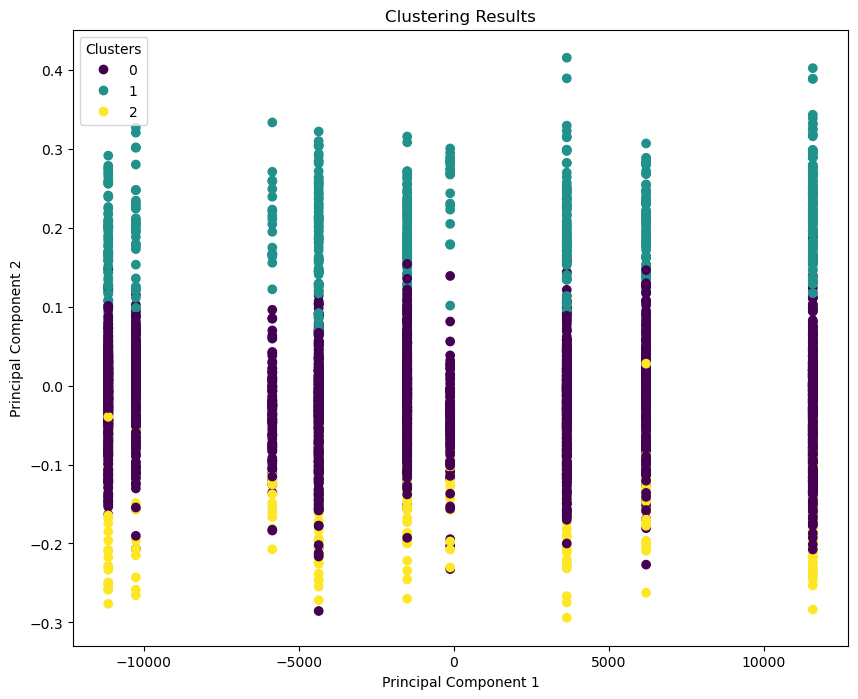

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Define the number of principal components
n_components = 2

# Reduce the dimensionality of the data using PCA
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

# Create a scatter plot of the data points with their assigned cluster labels
fig, ax = plt.subplots(figsize=(10, 8))
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters)

# Add a legend
legend = ax.legend(*scatter.legend_elements(), title='Clusters')

# Set the title and labels
ax.set_title('Clustering Results')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')

In [ ]:
# Define a range of number of clusters to try
n_clusters_range = range(2, 11)

# Compute the WCSS for each number of clusters
wcss = []
for n_clusters in n_clusters_range:
    kproto = KPrototypes(n_clusters=n_clusters, init='Cao', verbose=0)
    kproto.fit(X, categorical=list(range(X_text.shape[1], X.shape[1])))
    wcss.append(kproto.cost_)

# Plot the WCSS as a function of the number of clusters
plt.plot(n_clusters_range, wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.show()